# Phishing URL Classification using Machine Learning and Deep Learning Techniques

## Objective
#### A phishing website is a common social engineering method that mimics trustful Uniform Resource Locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural networks on the dataset created to predict phishing websites.

## Importing the necessary libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('urldata_FE.csv')

### Let's get familiar with the data
Few DataFrame methods are used to look at the data and it's features.

In [3]:
df.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,4,0,0,0,0,1,1,1,1,0,0,1,0,0
1,0,0,1,6,0,0,0,0,1,1,1,1,0,0,1,1,0
2,0,0,1,4,0,0,0,0,1,1,1,1,0,0,1,1,0
3,0,0,1,2,0,0,0,0,1,1,1,1,1,1,1,1,0
4,0,0,1,4,0,0,0,0,1,1,1,1,0,0,1,0,0


In [4]:
df.shape

(12400, 17)

In [5]:
df.size

210800

In [6]:
df.groupby('Label').size()

Label
0    6000
1    6400
dtype: int64

In [7]:
df.tail()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
12395,0,0,1,8,0,0,0,0,1,1,1,1,1,1,1,1,1
12396,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,1
12397,0,0,1,2,0,0,0,0,1,1,1,1,1,1,1,1,1
12398,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,1
12399,0,0,0,3,0,0,0,0,1,1,1,1,1,1,1,1,1


In [8]:
df

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,4,0,0,0,0,1,1,1,1,0,0,1,0,0
1,0,0,1,6,0,0,0,0,1,1,1,1,0,0,1,1,0
2,0,0,1,4,0,0,0,0,1,1,1,1,0,0,1,1,0
3,0,0,1,2,0,0,0,0,1,1,1,1,1,1,1,1,0
4,0,0,1,4,0,0,0,0,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,0,0,1,8,0,0,0,0,1,1,1,1,1,1,1,1,1
12396,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,1
12397,0,0,1,2,0,0,0,0,1,1,1,1,1,1,1,1,1
12398,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,1


In [9]:
df.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12400 entries, 0 to 12399
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        12400 non-null  int64
 1   Have_At        12400 non-null  int64
 2   URL_Length     12400 non-null  int64
 3   URL_Depth      12400 non-null  int64
 4   Redirection    12400 non-null  int64
 5   https_Domain   12400 non-null  int64
 6   TinyURL        12400 non-null  int64
 7   Prefix/Suffix  12400 non-null  int64
 8   DNS_Record     12400 non-null  int64
 9   Web_Traffic    12400 non-null  int64
 10  Domain_Age     12400 non-null  int64
 11  Domain_End     12400 non-null  int64
 12  iFrame         12400 non-null  int64
 13  Mouse_Over     12400 non-null  int64
 14  Right_Click    12400 non-null  int64
 15  Web_Forwards   12400 non-null  int64
 16  Label          12400 non-null  int64
dtypes: int64(17)
memory usage: 1.6 MB


## Let's Visualize the data
Because visualizing will give us good essence of the features/characteristics of the data.

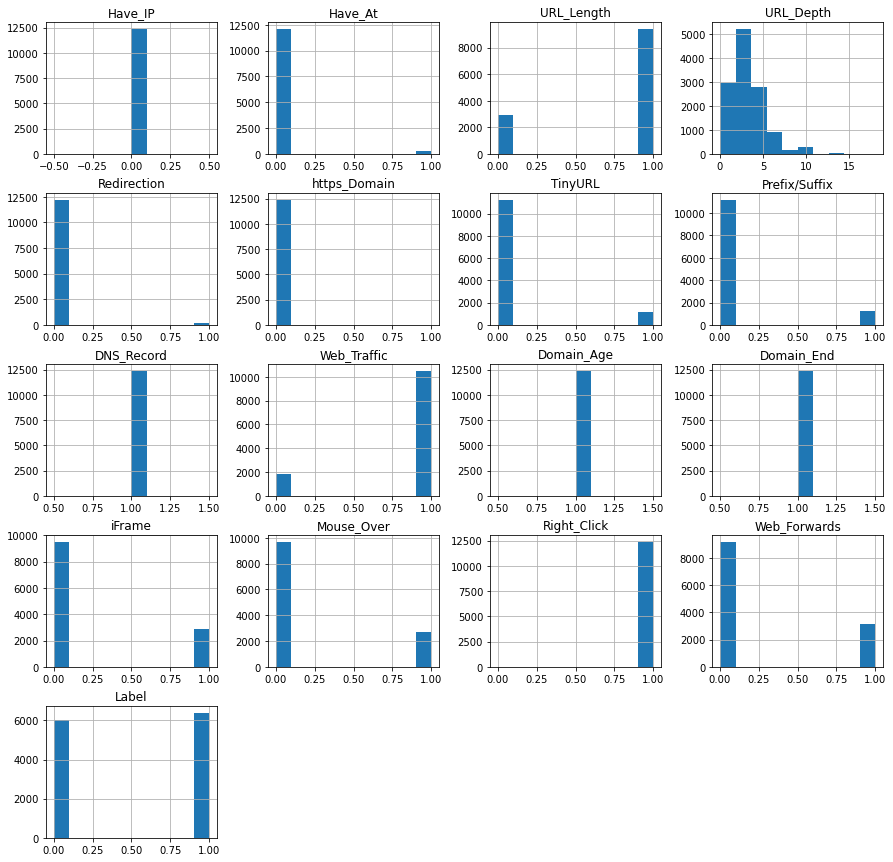

In [12]:
df.hist(figsize= (15,15)) #Hist -> Histogram
plt.show()

In [13]:
df['Domain_End']

0        1
1        1
2        1
3        1
4        1
        ..
12395    1
12396    1
12397    1
12398    1
12399    1
Name: Domain_End, Length: 12400, dtype: int64

In [14]:
numeric = ['Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'Web_Traffic', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label']

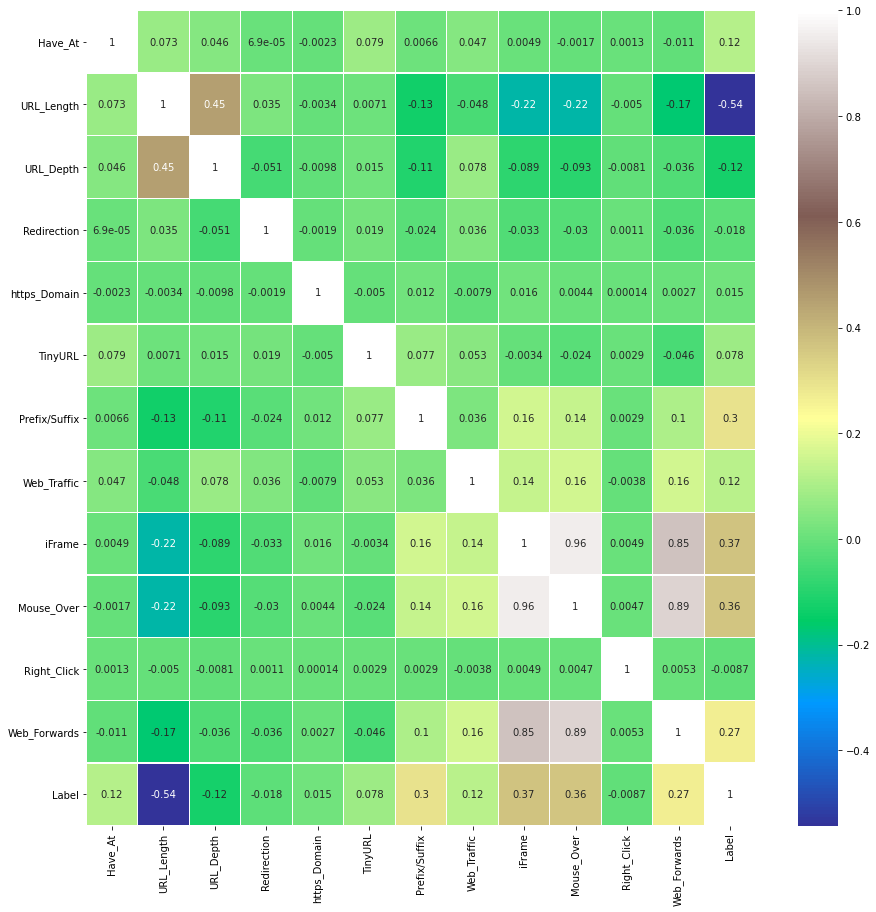

In [16]:
plt.figure(figsize= (15,15))
sns.heatmap(df[numeric].corr(), annot = True, cmap = 'terrain', linewidth = 0.3) #heatmap -> co-relation among features
plt.show()

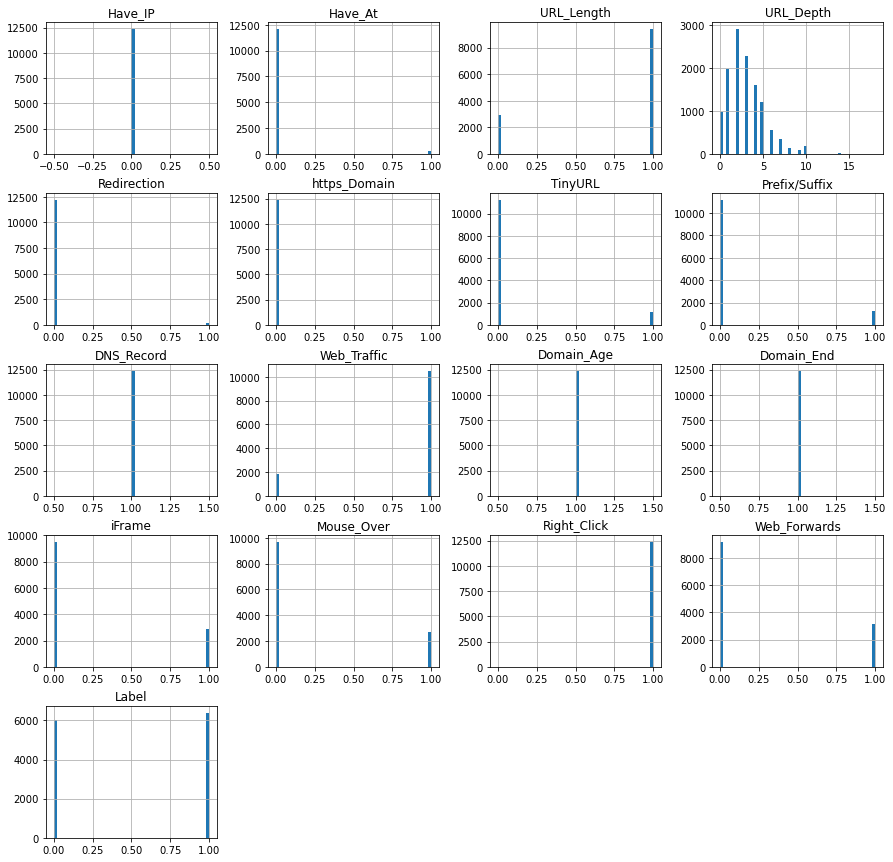

In [29]:
df.hist(bins = 50,figsize = (15,15))
plt.show()

## Data Preprocessing and Exploratory Data Analysis (EDA)
Cleaning of the data and then the cleaned data will be used in the models.

In [30]:
df.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,12400.0,12400.000000,12400.000000,12400.000000,12400.000000,12400.000000,12400.000000,12400.000000,12400.0,12400.000000,12400.0,12400.0,12400.000000,12400.000000,12400.000000,12400.000000,12400.000000
mean,0.0,0.022016,0.760645,3.033790,0.014597,0.000242,0.092258,0.096935,1.0,0.848548,1.0,1.0,0.231774,0.217258,0.999919,0.256774,0.516129
std,0.0,0.146742,0.426707,2.172102,0.119937,0.015553,0.289402,0.295882,0.0,0.358503,0.0,0.0,0.421983,0.412396,0.008980,0.436871,0.499760
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.0,1.0,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.0,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler() # For scaling the data to a particular range; let's say like [-2, 2]

## Split up the Data
Let us seggregate the Dependent and Target features.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [40]:
x.shape

(12400, 16)

In [41]:
x

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
0,0,0,1,4,0,0,0,0,1,1,1,1,0,0,1,0
1,0,0,1,6,0,0,0,0,1,1,1,1,0,0,1,1
2,0,0,1,4,0,0,0,0,1,1,1,1,0,0,1,1
3,0,0,1,2,0,0,0,0,1,1,1,1,1,1,1,1
4,0,0,1,4,0,0,0,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,0,0,1,8,0,0,0,0,1,1,1,1,1,1,1,1
12396,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0
12397,0,0,1,2,0,0,0,0,1,1,1,1,1,1,1,1
12398,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0


In [42]:
y.shape

(12400,)

In [43]:
y

0        0
1        0
2        0
3        0
4        0
        ..
12395    1
12396    1
12397    1
12398    1
12399    1
Name: Label, Length: 12400, dtype: int64

## Training and Testing
We will be splitting our whole data in to 70% of Training data and 30% of Training data.

In [44]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.3, random_state= 42)

In [45]:
x_train.shape

(8680, 16)

In [46]:
x_test.shape

(3720, 16)

# Logistic Regression

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Normalizing the data

In [48]:
X_train = sc.fit_transform(x_train)
X_train

array([[ 0.        , -0.15552746,  0.56120609, ..., -0.53258229,
         0.01073409, -0.59455925],
       [ 0.        , -0.15552746,  0.56120609, ...,  1.87764412,
         0.01073409,  1.68191816],
       [ 0.        , -0.15552746,  0.56120609, ..., -0.53258229,
         0.01073409, -0.59455925],
       ...,
       [ 0.        , -0.15552746,  0.56120609, ..., -0.53258229,
         0.01073409, -0.59455925],
       [ 0.        , -0.15552746,  0.56120609, ..., -0.53258229,
         0.01073409, -0.59455925],
       [ 0.        , -0.15552746, -1.78187659, ...,  1.87764412,
         0.01073409,  1.68191816]])

In [50]:
X_test = sc.fit_transform(x_test)
X_test

array([[ 0.        , -0.13645488,  0.56037783, ..., -0.5134072 ,
         0.        ,  1.74834397],
       [ 0.        , -0.13645488,  0.56037783, ..., -0.5134072 ,
         0.        , -0.57196983],
       [ 0.        , -0.13645488,  0.56037783, ..., -0.5134072 ,
         0.        , -0.57196983],
       ...,
       [ 0.        , -0.13645488,  0.56037783, ..., -0.5134072 ,
         0.        , -0.57196983],
       [ 0.        , -0.13645488,  0.56037783, ..., -0.5134072 ,
         0.        , -0.57196983],
       [ 0.        , -0.13645488,  0.56037783, ..., -0.5134072 ,
         0.        , -0.57196983]])

In [238]:
ML_Model = []
acc_train = []
acc_test = []

def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

In [227]:
lr = LogisticRegression(C=0.0015, max_iter=300, random_state=42, multi_class='ovr')

In [228]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.0015, max_iter=300, multi_class='ovr', random_state=42)

### Performance Evaluation:

In [229]:
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [230]:
y_test_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [231]:
y_train_lr

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [232]:
acc_train_lr = accuracy_score(y_train,y_train_lr)

In [233]:
acc_train_lr

0.833294930875576

In [234]:
acc_test_lr = accuracy_score(y_test,y_test_lr)
acc_test_lr

0.8244623655913978

### Storing the results for comparison 
We will be saving the results of all the models that we implement and compare among the models that performs better for the given dataset.

In [241]:
storeResults('Logistic Regression', acc_train_lr, acc_test_lr)

## Saving as .pickle file
.pickle files are used in the future purpose. It can be used to solve the problem given an in-time instance by calling the models through some API.

In [242]:
import pickle
file = open('LogisticRegression.pickle', 'wb')
pickle.dump(lr, file)

# Support Vector Machine (SVM)

In [279]:
from sklearn.svm import SVC

In [320]:
svm = SVC(kernel='rbf', C=100, random_state=42)

In [321]:
svm.fit(x_train, y_train)

SVC(C=100, random_state=42)

### Performance Evaluation:

In [322]:
y_test_svm = svm.predict(x_test)
y_train_svm = svm.predict(x_train)

In [323]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_train_svm

0.8535714285714285

In [324]:
acc_test_svm = accuracy_score(y_test,y_test_svm)
acc_test_svm

0.85

### Storing the results for comparison

In [325]:
storeResults('Support Vector Machine', acc_train_svm, acc_test_svm)

### Saving as .pickle file for future usage

In [326]:
file1 = open('SVM.pickle', 'wb')
pickle.dump(svm, file1)

# Multi Layer Perceptron (MLP) : Deep Learning
reffered to as feed-forward neural networks or just neural networks sometimes.

In [337]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.0001, hidden_layer_sizes=([100,100,100]), solver='adam', random_state=42)

In [342]:
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=[100, 100, 100], random_state=42)

### Performance Evaluation:

In [343]:
y_test_mlp = mlp.predict(x_test)
y_train_mlp = mlp.predict(x_train)

In [344]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_train_mlp

0.8623271889400922

In [345]:
acc_test_mlp = accuracy_score(y_test,y_test_mlp)
acc_test_mlp

0.8580645161290322

### Storing the results for comparison

In [346]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### Saving as .pickle file for future usage

In [347]:
file2 = open('MLP.pickle', 'wb')
pickle.dump(mlp, file2)

# AutoEncoders Neural Networks

In [348]:
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [726]:
input_dim = x_train.shape[1] # taking the number of dimensions of the data i.e number of features
encoding_dim = input_dim 

input_layer = Input(shape=(input_dim, )) # input layer consists of all the features in one column i.e shape=(input_dim,)
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer) # We are using l1 regularizer (y-ŷ)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder) # Creation of the model
autoencoder.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 16)]              0         
_________________________________________________________________
dense_84 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_85 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_86 (Dense)             (None, 14)                238       
_________________________________________________________________
dense_89 (Dense)             (None, 16)                240       
_________________________________________________________________
dense_90 (Dense)             (None, 16)                272       
Total params: 1,294
Trainable params: 1,294
Non-trainable params: 0
________________________________________________________

In [727]:
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy']) # optimizers use regularization terms in providing optimal solutions

#Training the model
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=512, shuffle=True, validation_split=0.2) # Validation is taking 20% of the data

Epoch 1/10
14/14 [==============================] - 1s 17ms/step - loss: 4.6543 - accuracy: 0.1122 - val_loss: 4.1512 - val_accuracy: 0.3157
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 3.7955 - accuracy: 0.6096 - val_loss: 2.6263 - val_accuracy: 0.8255
Epoch 3/10
14/14 [==============================] - 0s 4ms/step - loss: 2.5091 - accuracy: 0.8303 - val_loss: 2.1652 - val_accuracy: 0.8272
Epoch 4/10
14/14 [==============================] - 0s 4ms/step - loss: 2.0112 - accuracy: 0.8349 - val_loss: 0.8669 - val_accuracy: 0.8272
Epoch 5/10
14/14 [==============================] - 0s 4ms/step - loss: 0.5285 - accuracy: 0.8389 - val_loss: 0.2330 - val_accuracy: 0.8272
Epoch 6/10
14/14 [==============================] - 0s 4ms/step - loss: 0.1410 - accuracy: 0.8417 - val_loss: 0.1115 - val_accuracy: 0.8272
Epoch 7/10
14/14 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.8376 - val_loss: 0.0911 - val_accuracy: 0.8272
Epoch 8/10
14/14 [=

### Performance Evaluation:

In [729]:
acc_train_auto = autoencoder.evaluate(x_train, x_train)[1]
acc_train_auto

272/272 [==============================] - 0s 523us/step - loss: 0.0425 - accuracy: 0.8368


In [734]:
acc_test_auto = autoencoder.evaluate(x_test, x_test)[1]
acc_test_auto

117/117 [==============================] - 0s 585us/step - loss: 0.0372 - accuracy: 0.8462


0.8462365865707397

### Storing the results for comparison

In [735]:
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

### Obtaining the elbow curve for predicting the loss

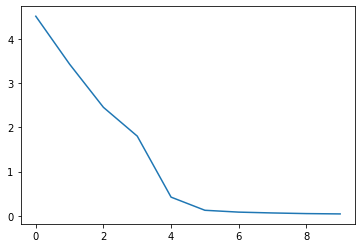

In [741]:
plt.plot(history.history['loss'])

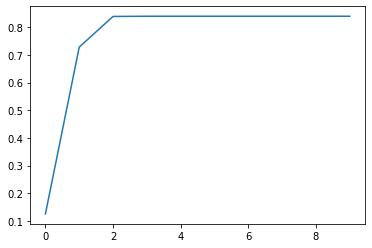

In [742]:
plt.plot(history.history['accuracy'])

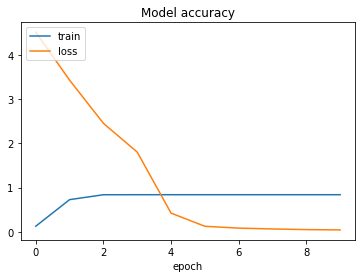

In [747]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

# XGBoost

In [754]:
from xgboost import XGBClassifier

In [827]:
xgb = XGBClassifier(learning_rate= 0.1 ,max_depth=3)

In [781]:
xgb.fit(x_train, y_train)

[20:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Performance Evaluation:

In [817]:
y_test_xgb = xgb.predict(x_test)
y_train_xgb = xgb.predict(x_train)

C:\Users\Manoj\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [818]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_train_xgb

0.851036866359447

In [819]:
acc_test_xgb = accuracy_score(y_test,y_test_xgb)
acc_test_xgb

0.8486559139784946

### Storing the results for comparison

In [820]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## Comparison of the Models

In [821]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})

In [825]:
results

,ML Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.833,0.824
1,Support Vector Machine,0.854,0.850
2,Multilayer Perceptrons,0.862,0.858
3,AutoEncoder,0.837,0.846
6,XGBoost,0.851,0.849


In [826]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Multilayer Perceptrons,0.862,0.858
1,Support Vector Machine,0.854,0.850
6,XGBoost,0.851,0.849
3,AutoEncoder,0.837,0.846
0,Logistic Regression,0.833,0.824


## Few of the conclusions that are driven

### > From the above obtained results we can state that for the given dataset, the Deep Learning model, Multi Layered Perceptron (MLP) comes up with a training accuracy of 86.2% and test accuracy of 85.8%, there by not being overfitted for having huge dimensions of data. 

### > Followed by Support Vector Machines (SVM) that have training accuracy of 85.4% and test accuracy of 85.0%. SVM's can be made effective by choosing the 'Radial Biased Kernel', which is a hyperparameter that is tuned during the hyperparameter tuning process.

### > A tree based model like XGBoost also tend to give an impressing results for the given Dataset with a learning rate of 0.1 and the depth with atmost 3.

## We will be using the MLP.pickle file for the validation process that is called using an API
Reason for using MLP.pickle is because of its highest accuracy (both training and test) over other models.